In [1]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

import environment as Env
import ray as Ray
import simulation as Sim

In [2]:
reload(Env)
reload(Ray)
reload(Sim)

<module 'simulation' from '/Users/anatole/Documents/GitHub/ray-tracer/simulation.py'>

In [3]:
# Source setup
source = np.array([0., 0.])
angle = -0.5

In [5]:
reload(Env)

# floor = lambda x: -550 * np.ones_like(x)
# floor = lambda x: -0.27 * x - 500
# floor = lambda x: -500 * np.sin(0.001 * x) - 750
floor = lambda x: np.maximum(-1 * np.exp(0.0005 * x) - 500, -1500 + 0.02*x)
# floor = lambda x: -5 * np.sin(0.01 * x) - 750

ceiling = lambda x: 0 * np.ones_like(x)

env = Env.Environment2D(
    floor=floor,
    ceiling=ceiling
)

In [44]:
reload(Ray)

freq = 100
ray = Ray.Ray2D (env, source, freq, angle)
ray.propagate()  # verbose=True)


"""
Stats (verbose off) [±0.5s]
- nothing: 13.9s
- npdL: 14.1s
- dL (pythagoras): 17.5s 17.1  17.2
- dL (np.linalg.norm): 17.5s
- dL dA: 28s
=> separate absorption calculation from ray tracing
""";

In [46]:
print(ray.XZ.shape)
print(ray.C.shape)
print(ray.dL.shape, ray.L.shape)
print(ray.dT.shape, ray.T.shape)

(100001, 2)
(100000,)
(100000,) (100001,)
(100000,) (100001,)


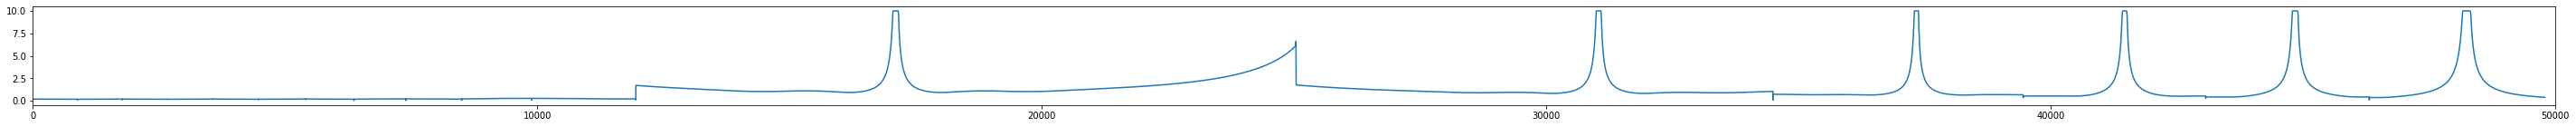

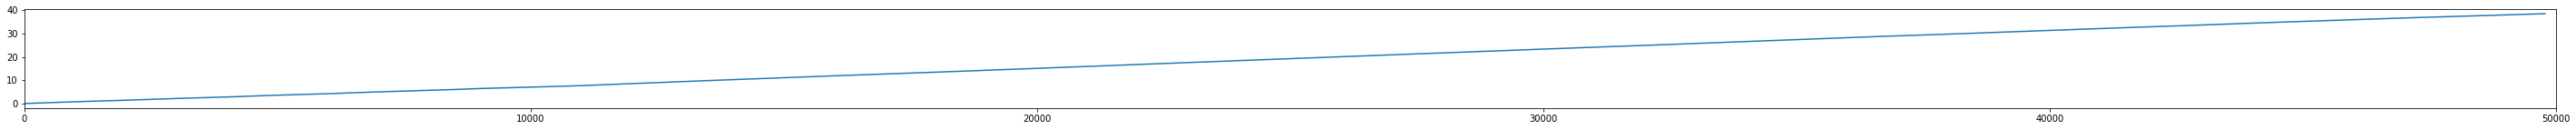

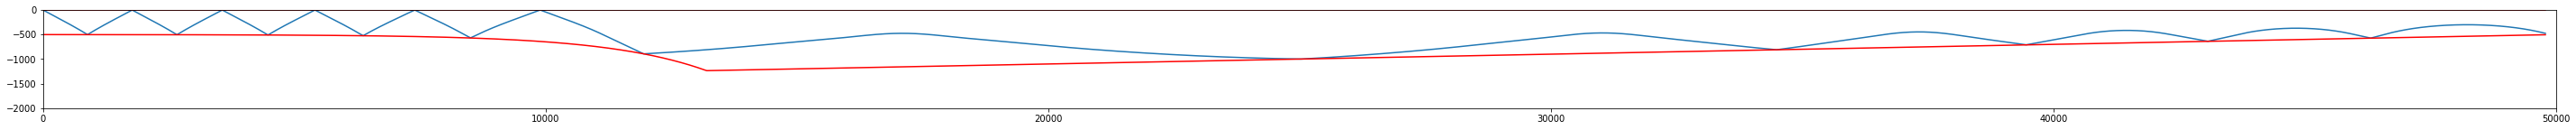

In [56]:
# plt.figure(figsize=(50, 2))
# plt.plot(ray.XZ[1:,0], ray.dL)
# plt.xlim((0, 50000))
# plt.show()

# # plt.figure(figsize=(50, 2))
# # plt.plot(ray.XZ[:,0], ray.dA)
# # plt.xlim((0, 50000))
# # plt.show()

# plt.figure(figsize=(50, 2))
# plt.plot(ray.XZ[:,0], np.cumsum(ray.dA))
# plt.xlim((0, 50000))
# plt.show()

# plt.figure(figsize=(50, 2))
# plt.plot(ray.XZ[:,0], ray.XZ[:,1])
# plt.plot(ray.XZ[:,0], ceiling(ray.XZ[:,0]), c='red')
# plt.plot(ray.XZ[:,0], floor(ray.XZ[:,0]), c='red')
# # plt.xlim((env.range_min.x, env.range_max.x))
# # plt.ylim((env.range_min.z, env.range_max.z))
# plt.xlim((0, 50000))
# plt.ylim((-2000, 0))
# plt.show()

In [20]:
reload(Ray)
reload(Env)
reload(Sim)

sim = Sim.Simulation2D (env)
# sim.add_rays (source, 100, -0.5, -0.6, -0.7, -0.8, -0.9, 1., dx_max=10, dz_max=10, n_rebounds_max=4, backprop=True)  # , verbose=True)
# sim.add_rays (source, 100, -0.5, -0.5001, -0.5002, -0.5003, -0.5004, dx_max=10, dz_max=10, backprop=False)  # , verbose=True)
# sim.add_rays (source, 100, -0.5, -0.500001, -0.500002, -0.500003, -0.50004, dx_max=10, dz_max=10, backprop=False)  # , verbose=True)

sim.add_rays (source,
    freq=100,
    *[i/100 for i in range(-1, -100, -1)],
    dx_max=10,
    dz_max=10,
    backprop=True,
    n_rebounds_max=4
)

KeyboardInterrupt: 

In [15]:
stop_reasons = [ray.stop_reason for ray in sim.get_rays()]
stop_reasons.sort()
stop_reasons_set = set(stop_reasons)
for sr in stop_reasons_set:
    n = stop_reasons.count(sr)
    print(f'{sr}: {n}')

exit-xmax: 92
exit-zmin: 7


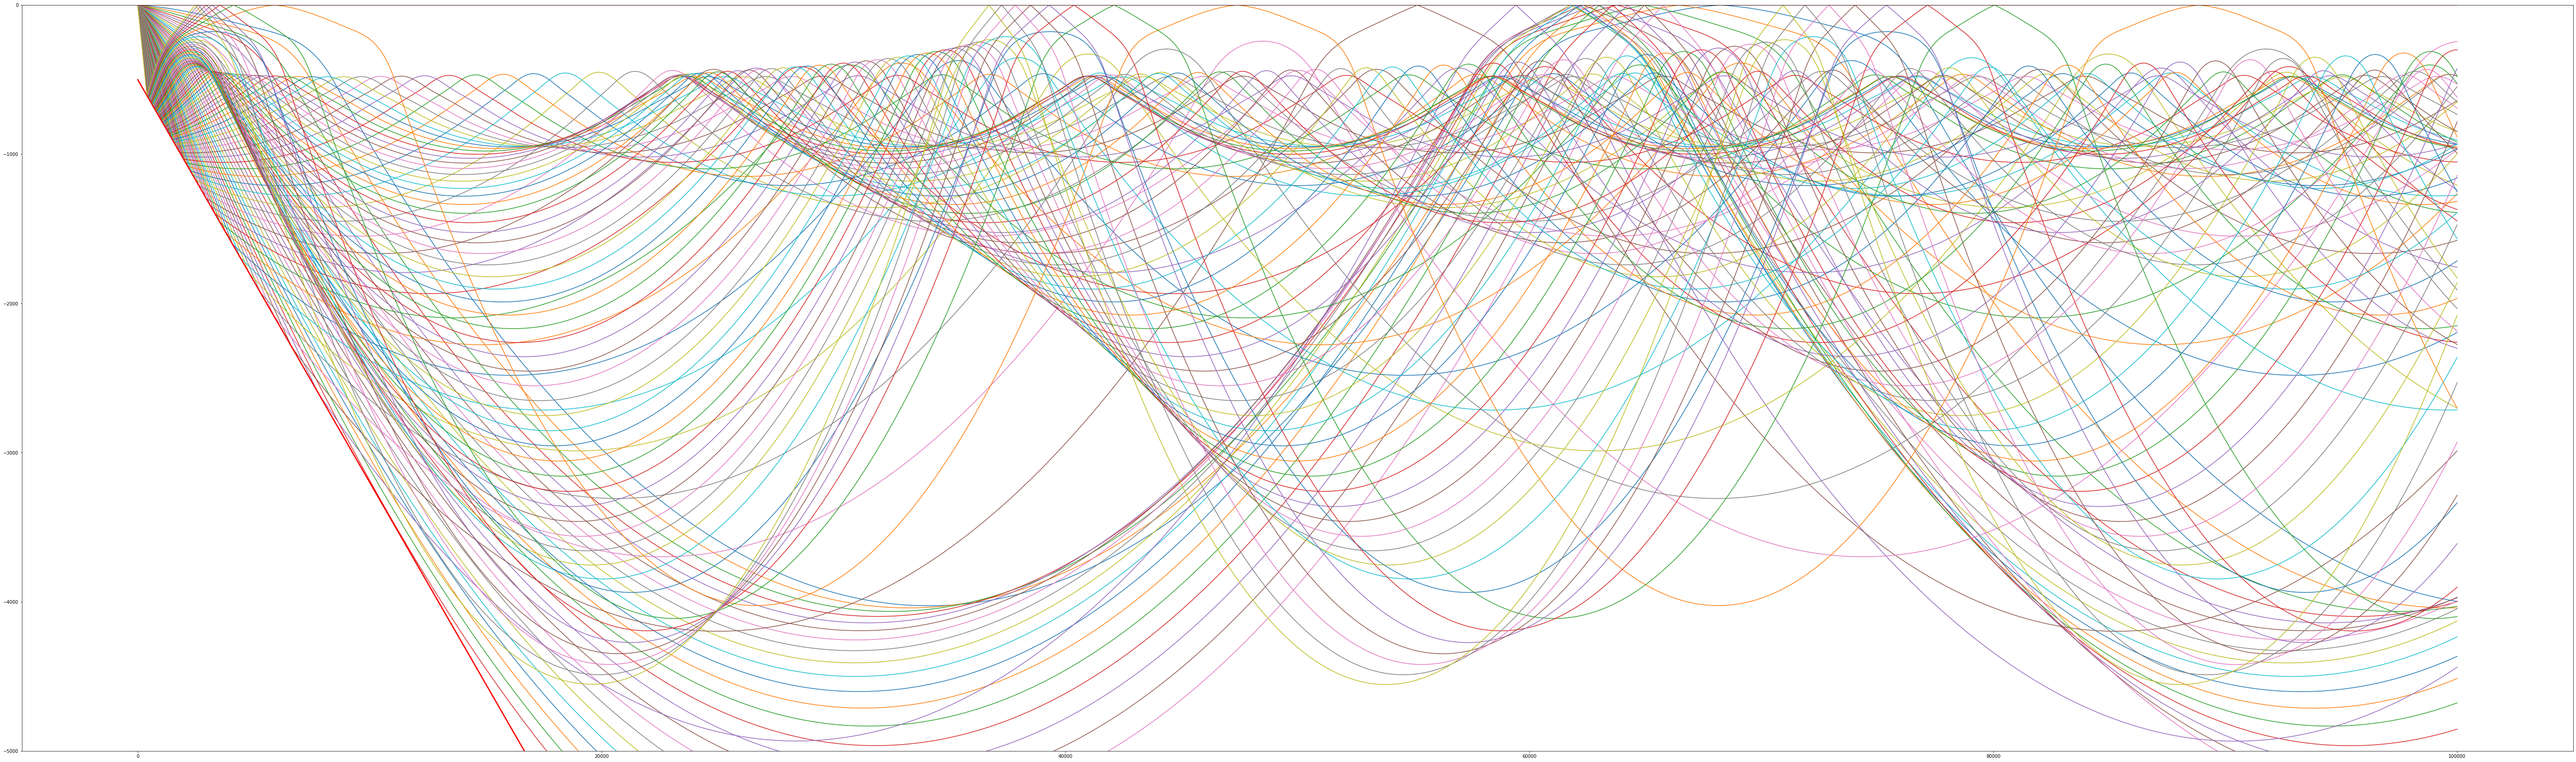

In [17]:
# plt.figure(figsize=(100, 4))
plt.figure(figsize=(100, 30))
for ray in sim.get_rays():
    plt.plot(ray.XZ[:,0], ray.XZ[:,1])
    plt.plot(ray.XZ[:,0], ceiling(ray.XZ[:,0]), c='red')
    plt.plot(ray.XZ[:,0], floor(ray.XZ[:,0]), c='red')
# plt.xlim((env.range_min.x, env.range_max.x))
# plt.ylim((env.range_min.z, env.range_max.z))
# plt.xlim((0, 50000))
# plt.ylim((-2000, 0))
plt.ylim(-5000, 0)
plt.show()

In [21]:
x = np.array([[1, 1, 2, 3, 4, 5], [1, 1, 2, 3, 4, 5]]).T
print(x.shape)
print(np.diff(x, axis=0))

(6, 2)
[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [30]:
x = np.array([[0, 0, 0, 0, 0, 0], [1, 1, 2, 3, 4, 5]]).T
print(x)
print(np.linalg.norm(x, axis=1))

[[0 1]
 [0 1]
 [0 2]
 [0 3]
 [0 4]
 [0 5]]
[1. 1. 2. 3. 4. 5.]


In [36]:
z = np.array([-1, -2, -3, -4, -5])
from physics.profile_velocity import calc_c
calc_c(z)

array([1526.85095522, 1526.83411938, 1526.81741264, 1526.80083513,
       1526.78438699])